# stub for heatmap/pcolormesh tutorial
* surface dataset
+ heatmap
+ pcolormesh

In [5]:
import matplotlib.pyplot as plt

In [8]:
im = plt.imread('../data/15-B.tif')

In [11]:
type(im)

numpy.ndarray

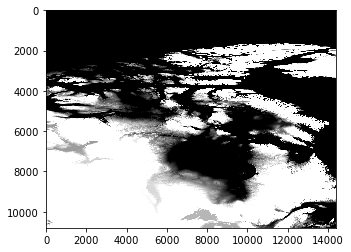

In [12]:
plt.imshow(im)

In [15]:
im.shape

(10801, 14401, 4)